In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
training = pd.read_csv('TitanicData/train.csv')
test = pd.read_csv('TitanicData/test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

In [8]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
 11  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 132.9+ KB


In [15]:
all_data.describe()

PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare   train_test  
count  1309.000000  1308.000000  1309.000000  
mean      0.385027    33.295479     0.680672  
std       0.865560    51.758668     0.466394  
min       0.000000     0.000000     0.000000  
25%       0.000000     7.895800     0.000000  
50%       0.000000    14.454200     1.000000  
75%       0.000000    31.275000     1.000000  
max       9.000000   512.329200     1.000000

In [14]:
# I REALISED LESS THAT I HAD LESS THAN 20% OF DATA ON THE
# PASSANGER CABIN SO I WILL DROP THE WHOLE COLUMN

all_data.drop('Cabin', axis='columns', inplace=True)

In [55]:
# SPLIT INTO NUMERIC AND NON NUMERIC DATAFRAMES
# num --> Histograms
# non numeric or category --> bar chart

df_num = all_data[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = all_data[['Survived', 'Pclass', 'Sex', 'Ticket', 'Embarked']]

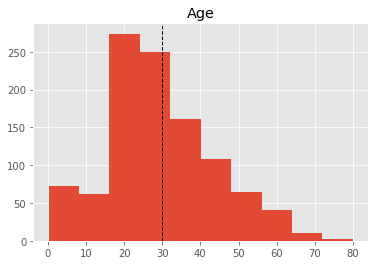

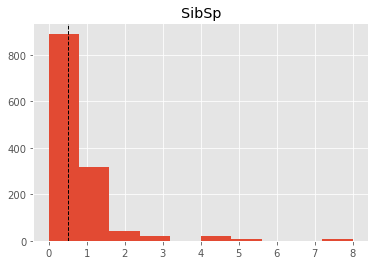

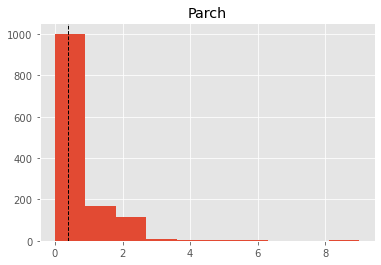

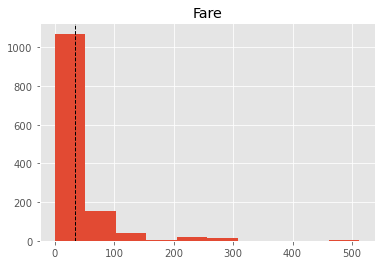

In [56]:
for x in df_num.columns:
    plt.style.use('ggplot')
    plt.hist(df_num[x])
    plt.title(x)
    plt.axvline(df_num[x].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.show()

<AxesSubplot:>

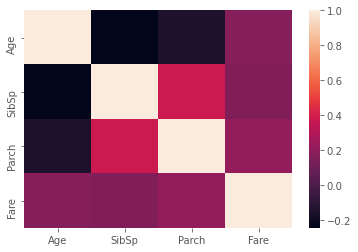

In [57]:
# CAN'T REALLY SEE ANY CORELATION --> USE SNS HEATMAP
# .corr() shows the corelation 
# REMEMBER CORELATION DOES NOT MEAN CAUSATION!!!

sns.heatmap(df_num.corr())

# The heatmap indicates that the values don't tend to match
# Remotely the number of siblings/spouses will influence the 
# number of family members on board but that is expected

In [58]:
# Now let's see if any of the numeric values had 
# something to do with the survival rate

survived_num = pd.pivot_table(all_data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])
survived_num

# It does! the younger survived more,the ones that paid more ;-; 
# The ones with more family members/parents survived more and if 
# they had spouses or siblings they didn't

Age       Fare     Parch     SibSp
Survived                                          
0.0       30.626179  22.117887  0.329690  0.553734
1.0       28.343690  48.395408  0.464912  0.473684

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


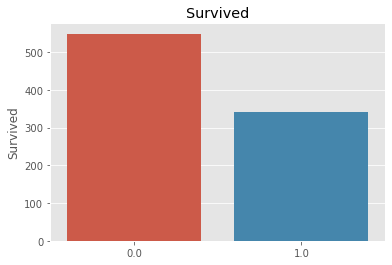

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


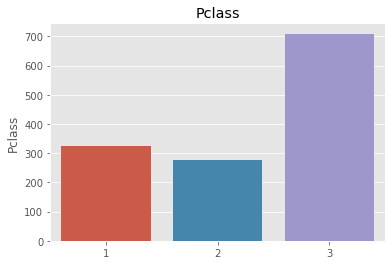

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


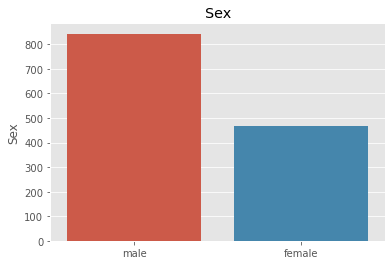

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


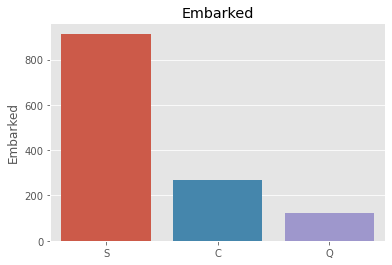

In [62]:
# NOW LET'S MOVE TO NON NUMERIC VALUES!
# I DONT WANT TO SEE THE TICKETS BECAUSE THAT IS TOTALLY IRELEVANT

for x in df_cat.columns:
    if x != 'Ticket':
        sns.barplot(df_cat[x].value_counts().index, df_cat[x].value_counts()).set_title(x)
    plt.show()

In [83]:
CLASS_SURVIVED = pd.pivot_table(all_data, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count')
SEX_SURVIVED = pd.pivot_table(all_data, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count')
EMBARKED_SURVIVED = pd.pivot_table(all_data, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count')

In [84]:
CLASS_SURVIVED

Pclass      1   2    3
Survived              
0.0        80  97  372
1.0       136  87  119

In [85]:
SEX_SURVIVED

Sex       female  male
Survived              
0.0           81   468
1.0          233   109

In [86]:
EMBARKED_SURVIVED

Embarked   C   Q    S
Survived             
0.0       75  47  427
1.0       93  30  217

In [92]:
all_data['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
all_data['name_title'].value_counts()
TITLE_SURVIVED = pd.pivot_table(all_data, index = 'Survived', columns = 'name_title', values  = 'Ticket' ,aggfunc ='count')

In [93]:
# WHO SURVIVED AND NOT DEPENDING 

TITLE_SURVIVED

name_title  Capt  Col  Don   Dr  Jonkheer  Lady  Major  Master   Miss  Mlle  \
Survived                                                                      
0.0          1.0  1.0  1.0  4.0       1.0   NaN    1.0    17.0   55.0   NaN   
1.0          NaN  1.0  NaN  3.0       NaN   1.0    1.0    23.0  127.0   2.0   

name_title  Mme     Mr   Mrs   Ms  Rev  Sir  the Countess  
Survived                                                   
0.0         NaN  436.0  26.0  NaN  6.0  NaN           NaN  
1.0         1.0   81.0  99.0  1.0  NaN  1.0           1.0